# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Lee**  <br/>
Firstname: **Jian Hui**    <br/>
Student ID: **32116314**    <br/>
Email: **jlee0235@student.monash.edu**    <br/>
Your tutorial time: **Friday 2 to 4 pm**    <br/>
***


$$
    \theta
$$

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

### LIBRARY IMPORTS & CONSTANTS


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import math
%matplotlib inline

MY_SEED = 1234


def label_smooth(y_k, alpha, K):
    """
    The label smoothing function

    Args:
        y_k: the original y label
        alpha: the label smoothing parameter
        K: the number of classes there are
    """
    y_k, K = float(y_k), float(K)
    
    # based on the formula propseod by the research paper in 1.1 preliminaries
    modified = y_k * (1 - alpha) + alpha/K
    
    return modified 


## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.random.set_seed(MY_SEED)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

#Insert your code here

(X_train_full_img, y_train_full), (X_test_img, y_test) =  fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [4]:
num_train = X_train_full_img.shape[0]
print(X_train_full_img.shape)
print(num_train)
num_test = X_test_img.shape[0]

# insert your code here 
X_train_full = X_train_full_img.reshape(num_train,-1)  # NOTE: what does /255.0 do??
print(X_train_full)
X_test = X_test_img.reshape(num_test, -1)
#Insert your code above

print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28)
60000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [5]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)

# insert your code below

# 1: Print out the dimensions of X_train_full and X_test
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_test.shape: {X_test.shape}')

# 2: splitting datasets
def train_valid_test_split(train_full_x, train_full_y, train_size, valid_size):
    """ valid size is depedent on train_size """
    valid_size = 0.1 * train_size    
    X_train, X_valid, y_train, y_valid = train_test_split(train_full_x, train_full_y, test_size = valid_size)
    return X_train, X_valid, y_train, y_valid

partitions = train_valid_test_split(X_train_full, y_train_full, 0.9, 0.1)

X_train, y_train = partitions[0], partitions[2]
X_valid, y_valid = partitions[1], partitions[3]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_valid.shape: {X_valid.shape}, y_valid.shape: {y_valid.shape}')

# 3: Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0
print(f'X_train: {X_train}\n , X_valid: {X_valid}\n, X_test: {X_test}')



X_train_full.shape: (60000, 784)
X_test.shape: (10000, 784)
X_train.shape: (54599, 784), y_train.shape: (54599,), X_valid.shape: (5401, 784), y_valid.shape: (5401,)
X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 , X_valid: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00392157 ... 0.00392157 0.         0.        ]
 [0.         0.         0.         ... 0.20784314 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
, X_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(y_train[:50])
subset = y_train[:50]
smooth_subset = [label_smooth(label, 0.1, len(subset)) for label in subset]
smooth_subset

[1 2 9 7 6 6 6 6 6 7 6 9 0 9 7 0 6 0 8 4 4 7 9 8 5 5 3 1 2 8 7 0 1 5 8 4 6
 6 7 7 4 0 1 6 3 9 7 6 8 5]


[0.902,
 1.802,
 8.102,
 6.302,
 5.402,
 5.402,
 5.402,
 5.402,
 5.402,
 6.302,
 5.402,
 8.102,
 0.002,
 8.102,
 6.302,
 0.002,
 5.402,
 0.002,
 7.202,
 3.602,
 3.602,
 6.302,
 8.102,
 7.202,
 4.502,
 4.502,
 2.702,
 0.902,
 1.802,
 7.202,
 6.302,
 0.002,
 0.902,
 4.502,
 7.202,
 3.602,
 5.402,
 5.402,
 6.302,
 6.302,
 3.602,
 0.002,
 0.902,
 5.402,
 2.702,
 8.102,
 6.302,
 5.402,
 7.202,
 4.502]

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

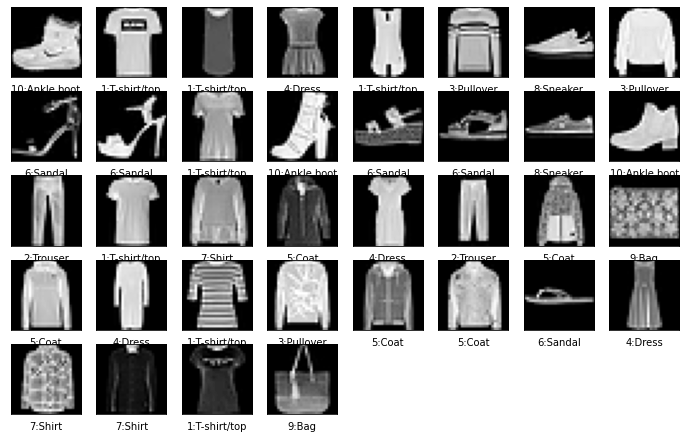

In [8]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


def visualize_data(images, categories, images_per_row = 8):
    
    class_names = ["1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"]
    
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    
    # plotting the images onto the plot space
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap="gray")
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()
    

visualize_data(X_train_full_img[:36], y_train_full[:36])


####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [10]:
#Insert your code here and you can add more cells if necessary
EPOCHS = 20

class DNN(tf.keras.Model):
    def __init__(self, num_classes= 10, hiddenAct=keras.activations.relu, neuronCount = (20,40)):
        super(DNN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = Dense(units=neuronCount[0],  input_shape=(n_features,), activation=hiddenAct)
        self.dense2 = Dense(units=neuronCount[1], activation=hiddenAct)
        self.dense3 = Dense(self.num_classes, activation= 'softmax')
    
    def call(self, inputs):
        # ME: forward propagation
        # print(self.dense1.weights)
        h = self.dense1(inputs)
        # print(self.dense2.weights)
        h = self.dense2(h)
        # print(self.dense3.weights)
        h = self.dense3(h)
        return h

# 1: pre-processing (splitting is done earlier)
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))
print(f'train_size: {train_size} | n_features: {n_features} | n_classes: {n_classes}')

# 2: Build the feed forward network 784 -> 20(ReLU) -> 40(ReLU) -> 10(softmax)
# dnn_model = Sequential()
# dnn_model.add(Dense(units=20,  input_shape=(n_features,), activation='relu'))
# dnn_model.add(Dense(units=40, activation='relu'))
# dnn_model.add(Dense(units=n_classes, activation='softmax'))
model = DNN(n_classes)

# 3: compile the model with optimizer of choice

model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])


# 4: training the model (20 epochs)

# Initialize a tensorboard_callback 
logDirectory = "tf_logs/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logDirectory)

# Call the fit method, passing the tensorboard_callback 
history = model.fit(    x=X_train, y=y_train, 
                        batch_size=32, 
                        epochs=EPOCHS, 
                        validation_data=(X_valid, y_valid), 
                        callbacks=[tensorboard_callback])

model.summary()


train_size: 54599 | n_features: 784 | n_classes: 10
Epoch 1/20
1707/1707 [==============================] - 15s 9ms/step - loss: 0.5907 - accuracy: 0.7926 - val_loss: 0.4687 - val_accuracy: 0.8341
Epoch 2/20
1707/1707 [==============================] - 2s 885us/step - loss: 0.4246 - accuracy: 0.8505 - val_loss: 0.4453 - val_accuracy: 0.8430
Epoch 3/20
1707/1707 [==============================] - 2s 893us/step - loss: 0.3938 - accuracy: 0.8596 - val_loss: 0.4235 - val_accuracy: 0.8495
Epoch 4/20
1707/1707 [==============================] - 1s 646us/step - loss: 0.3717 - accuracy: 0.8682 - val_loss: 0.3899 - val_accuracy: 0.8580
Epoch 5/20
1707/1707 [==============================] - 1s 618us/step - loss: 0.3540 - accuracy: 0.8727 - val_loss: 0.3929 - val_accuracy: 0.8613
Epoch 6/20
1707/1707 [==============================] - 1s 823us/step - loss: 0.3423 - accuracy: 0.8761 - val_loss: 0.3961 - val_accuracy: 0.8571
Epoch 7/20
1707/1707 [==============================] - 1s 777us/step - l

In [11]:
# 5: peformance evaluation of trained model
model.evaluate(X_test, y_test)  #return loss and accuracy


313/313 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8640


[0.3887161612510681, 0.8640000224113464]

In [12]:
# 6: save the model
model.save('q2-4_model', save_format='tf')


INFO:tensorflow:Assets written to: q2-4_model\assets


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

---
#### **we want to optimize:**

1. number of neurons $n1, n2$ (range is between 20 to 40 neurons)
2. activation functions used, $act \in \{ sigmoid, tanh, relu\}$ 

optional: can use ANY optimizer and learning rate 

In [18]:
#Insert your code here. You can add more cells if necessary


lst_neurons_count = [20,40] # generate integers from 20 to 40 for simplicity's sake
lst_acts = [keras.activations.sigmoid, keras.activations.tanh, keras.activations.relu]

best_acc= - np.inf
best_history = None

best_neurons_combo = [None, None]
for act in lst_acts:
    for nc1 in lst_neurons_count:  # for the 1st hidden layer
        for nc2 in lst_neurons_count:  # for the 2nd hidden layer
            # build the model
            dnn = DNN(num_classes=n_classes, hiddenAct=act, neuronCount=(nc1, nc2)) # specifies the activation func to use for hidden layers 
            # dnn.build(input_shape = (None, 784))
            dnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimzer is deaulted to RMSProp
            
            # model fitting
            print(f"Training with activation = {str(act)},  {nc1} neurons on 1st hidden layer, {nc2} on 2nd hidden layer")
            history = dnn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)
            
            # performance evaluation
            valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid)
            print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))
            
            # check for better model
            if(valid_acc > best_acc):
                best_acc = valid_acc
                best_model = dnn
                best_act = act
                best_neurons_combo[0], best_neurons_combo[1] = nc1, nc2
                best_history = history



print(f'The best model is with activation function = {best_act}, {best_neurons_combo[0]} neurons on 1st hidden layer, {best_neurons_combo[1]} on 2nd hidden layer')
best_model.save('2-5_tuned_model', save_format='tf')
print('Saved the best model to hard disk')



Training with activation = <function sigmoid at 0x00000245F8A934C0>,  20 neurons on 1st hidden layer, 20 on 2nd hidden layer
169/169 [==============================] - 0s 613us/step - loss: 0.3813 - accuracy: 0.8626
	valid acc = 0.8626180291175842, valid loss = 0.38127997517585754
Training with activation = <function sigmoid at 0x00000245F8A934C0>,  20 neurons on 1st hidden layer, 40 on 2nd hidden layer
169/169 [==============================] - 0s 619us/step - loss: 0.3995 - accuracy: 0.8602
	valid acc = 0.8602110743522644, valid loss = 0.39953741431236267
Training with activation = <function sigmoid at 0x00000245F8A934C0>,  40 neurons on 1st hidden layer, 20 on 2nd hidden layer
169/169 [==============================] - 0s 566us/step - loss: 0.3695 - accuracy: 0.8680
	valid acc = 0.8679873943328857, valid loss = 0.36954474449157715
Training with activation = <function sigmoid at 0x00000245F8A934C0>,  40 neurons on 1st hidden layer, 40 on 2nd hidden layer
169/169 [====================

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

### Report of performances

From my observations, using different alpha values did result in different performances in terms of validation accuracy.

Due to my misundestanding of the question, it was initially observed that doing label smoothing on only the training labels BUT not on the validation labels, offer a better performance with higher values of alpha.

However, now that we introduced label smoothing to both training and validation dataset labels, it was found that the lowest alpha value = 0.1 offer the best validation accuracy. After testing against the test set, it also yielded an accuracy of 87%.

___
#### Run Results:
Training best model from q2.5 with alpha=0.1
169/169 [==============================] - 0s 786us/step - loss: 0.7614 - accuracy: 0.8859
	valid acc = 0.885947048664093, valid loss = 0.7613660097122192
Training best model from q2.5 with alpha=0.15
169/169 [==============================] - 0s 744us/step - loss: 0.9228 - accuracy: 0.8843
	valid acc = 0.8842806816101074, valid loss = 0.9227955341339111
Training best model from q2.5 with alpha=0.2
169/169 [==============================] - 0s 732us/step - loss: 1.0806 - accuracy: 0.8852
	valid acc = 0.8852064609527588, valid loss = 1.080588459968567

In [19]:
def smoothen(label_vectors, alph):
    """ smoothens labels in the form of one hot vectors""" 
    # label_vectors = one hot vector of smoothed labels
    smoothed = []
    for vector in label_vectors:
        smoothed_label_vector = []
        for bit in vector:
            # smoothed_label_vector =  [label_smooth(y_k=bit, alpha=alph, K=len(vector)) for bit in vector]
            smoothed_bit = label_smooth(y_k=bit, alpha=alph, K=len(vector))
            smoothed_label_vector.append(smoothed_bit)
            # print(f'{bit} , {smoothed_bit}')
        # print(f'before smooth ({len(vector)}): {vector}, after smooth ({len(smoothed_label_vector)}): {smoothed_label_vector}')
        smoothed.append(smoothed_label_vector)
    return smoothed
 
# smoothen(np.eye(n_classes)[y_train], 0.1)


In [20]:
#Insert your code here. You can add more cells if necessary

# 1: prepare several smooth labelling parameters, alpha
alphas = [0.1, 0.15, 0.2]


# 2: fit and see evaluate performance of each smooth labelling parameter, alpha 
# NOTE: we need to use the BEST model using the BEST hyper parameters from Q2.5
best_alpha = None
best_acc = - np.inf
best_history = None

for alpha in alphas:    
    # build the model
    dnn = DNN(num_classes=10, hiddenAct=best_act, neuronCount=best_neurons_combo) # specifies the activation func to use for hidden layers 
    dnn.build(input_shape = (None, 784))
    # need to use CategoricalCrossentropy instead of sparse_categorical_crossentropy
    # cce = tf.keras.losses.CategoricalCrossentropy()
    dnn.compile(loss="categorical_crossentropy", metrics=['accuracy']) # optimzer is deaulted to RMSProp
    
    # model fitting
    print(f"Training best model from q2.5 with alpha={alpha}")
    # NOTE: this is where we "smoothen" the y labels BUT we need to convert the list of labels into a list of one-hot-vectors first
    history = dnn.fit(X_train, np.array(smoothen(np.eye(n_classes)[y_train], alpha)), batch_size=32, epochs=10, verbose=0)
    
    # performance evaluation
    y_valid_vector = np.array(smoothen(np.eye(n_classes)[y_valid], alpha)) # also smoothen y valid
    valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid_vector)
    print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))

    # check for better model using different alpha values
    if(valid_acc > best_acc):
        best_alpha = alpha
        best_acc = valid_acc
        best_model = dnn
        best_history = history

print(f'The best alpha from 2.5 DNN model is alpha={best_alpha}')
best_model.save('2-6_tuned_model', save_format='tf')
print('Saved the best alpha model for 2.6 to hard disk')


Training best model from q2.5 with alpha=0.1
169/169 [==============================] - 0s 607us/step - loss: 0.8132 - accuracy: 0.8632
	valid acc = 0.8631734848022461, valid loss = 0.8131553530693054
Training best model from q2.5 with alpha=0.15
169/169 [==============================] - 0s 524us/step - loss: 0.9855 - accuracy: 0.8508
	valid acc = 0.8507683873176575, valid loss = 0.9854788780212402
Training best model from q2.5 with alpha=0.2
169/169 [==============================] - 0s 607us/step - loss: 1.1150 - accuracy: 0.8704
	valid acc = 0.8703943490982056, valid loss = 1.1149624586105347
The best alpha from 2.5 DNN model is alpha=0.2
INFO:tensorflow:Assets written to: 2-6_tuned_model\assets
Saved the best alpha model for 2.6 to hard disk


In [21]:
dnn.evaluate(X_test, np.eye(n_classes)[y_test])

313/313 [==============================] - 0s 632us/step - loss: 0.5251 - accuracy: 0.8666


[0.5250518918037415, 0.866599977016449]